### Import the must required librarires....

In [1]:
import pandas as pd
import numpy as np

# import libraries for visuallization of the data....
import seaborn as sns
import matplotlib.pyplot as plt

# import library for statistical analysis....
import scipy.stats as stats
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm
from scipy.stats import chi2_contingency

# for splitting the data...
from sklearn.model_selection import train_test_split

# import librarires for modelling purpose...
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# import libraries for model eavaluation....
from sklearn.metrics import roc_auc_score,precision_score,classification_report,recall_score,accuracy_score

# import the warnings library for ignoring warnings by that notebook does not look like dense filled..
import warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [2]:
data = pd.read_csv('Student Depression Dataset.csv')

In [3]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


#### Data exploration:

In [4]:
data.shape

(27901, 18)

In [5]:
data.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [6]:
data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [7]:
for i in data.drop(columns=['id','Study Satisfaction']):
    print(data[i].value_counts())
    print('----------------------------')

Male      15547
Female    12354
Name: Gender, dtype: int64
----------------------------
24.0    2258
20.0    2237
28.0    2133
29.0    1950
33.0    1893
25.0    1784
21.0    1726
23.0    1645
18.0    1587
19.0    1560
34.0    1468
27.0    1462
31.0    1427
32.0    1262
22.0    1160
26.0    1155
30.0    1145
35.0      10
38.0       8
36.0       7
42.0       4
48.0       3
39.0       3
43.0       2
46.0       2
37.0       2
49.0       1
51.0       1
44.0       1
59.0       1
54.0       1
58.0       1
56.0       1
41.0       1
Name: Age, dtype: int64
----------------------------
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal      

In [8]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [9]:
nums = ['Age', 'CGPA']
cats = ['Gender', 'Profession', 'Academic Pressure',
       'Work Pressure','Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression']


### Univariate Analysis:

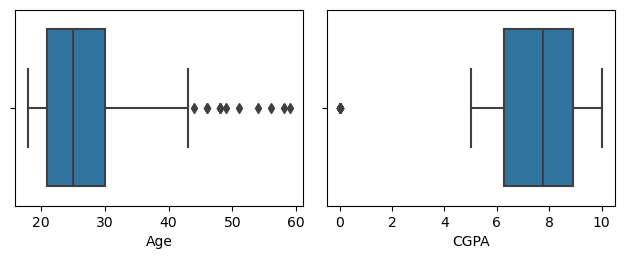

In [10]:
t = 1
for i in nums:
    plt.subplot(2,2,t)
    sns.boxplot(x=data[i])
    t+=1
    
plt.tight_layout()
plt.show()

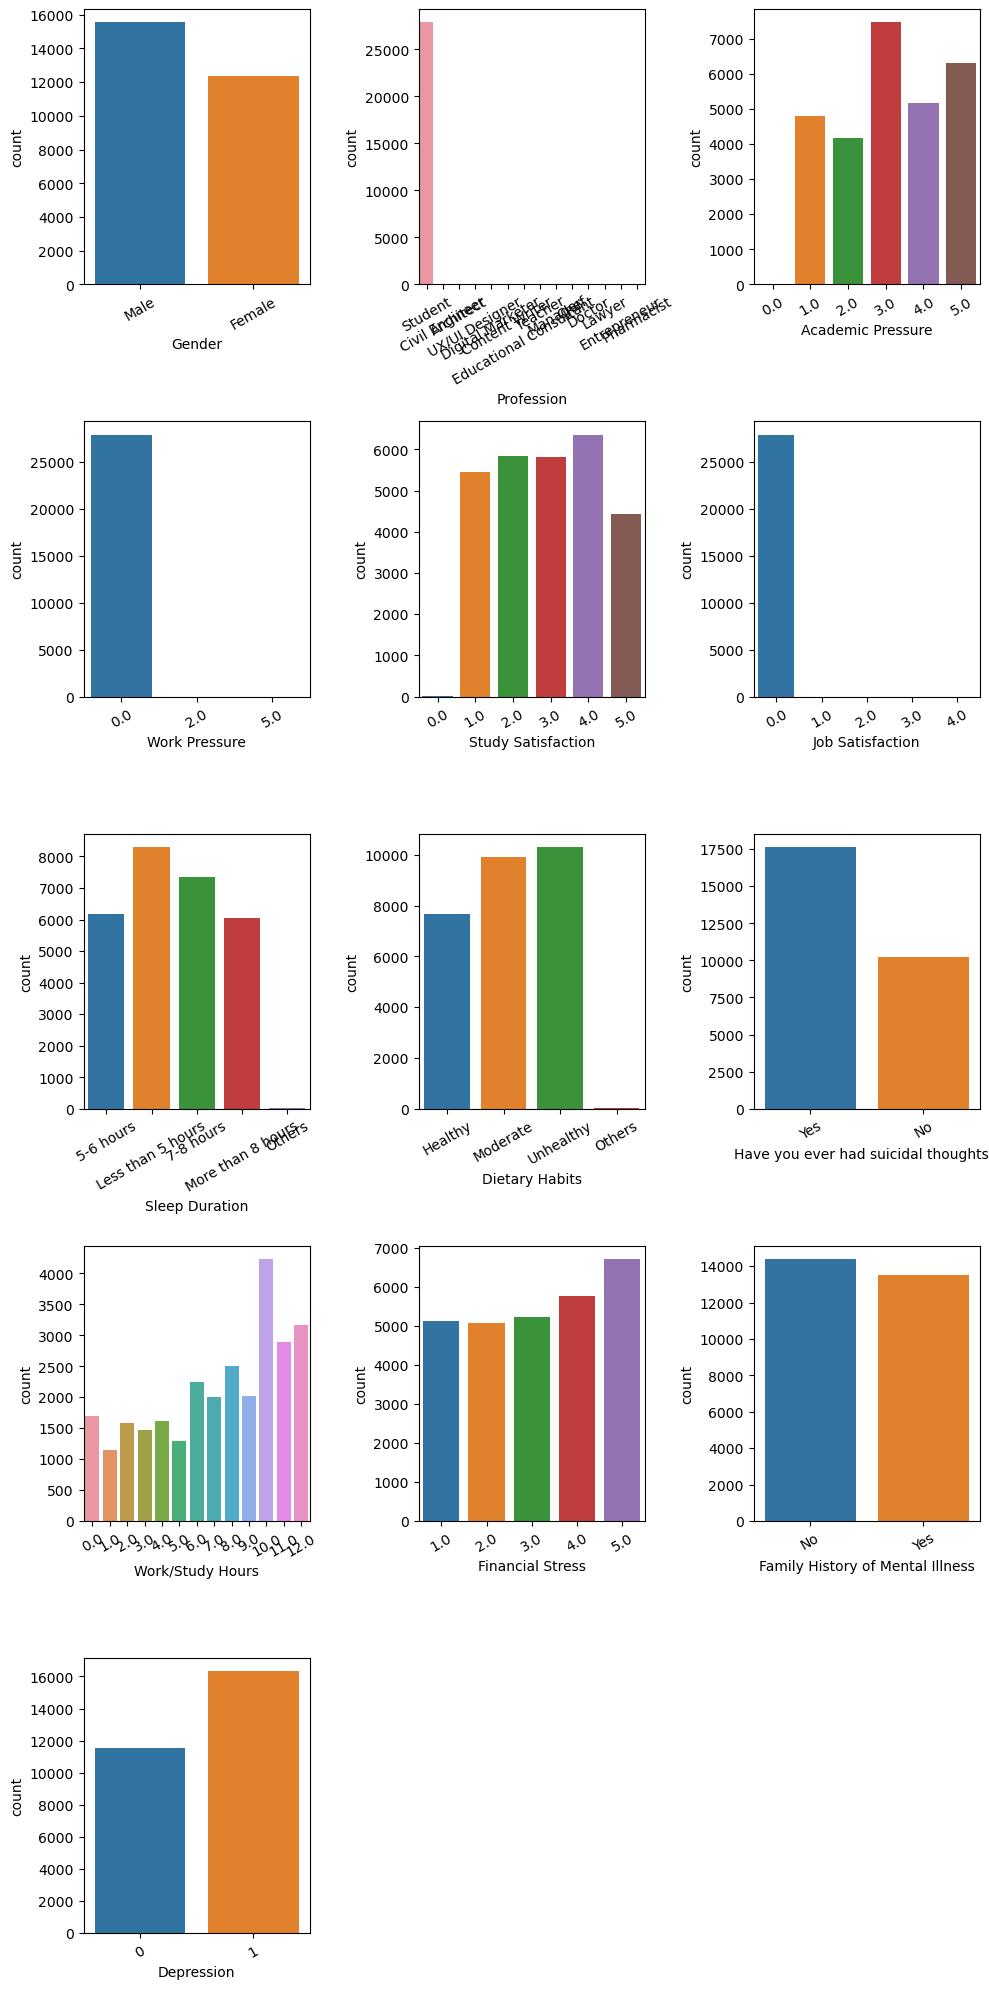

In [11]:
t =1
plt.figure(figsize=(10,20))
for i in cats:
    plt.subplot(5,3,t)
    sns.countplot(x=data[i])
    t+=1
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

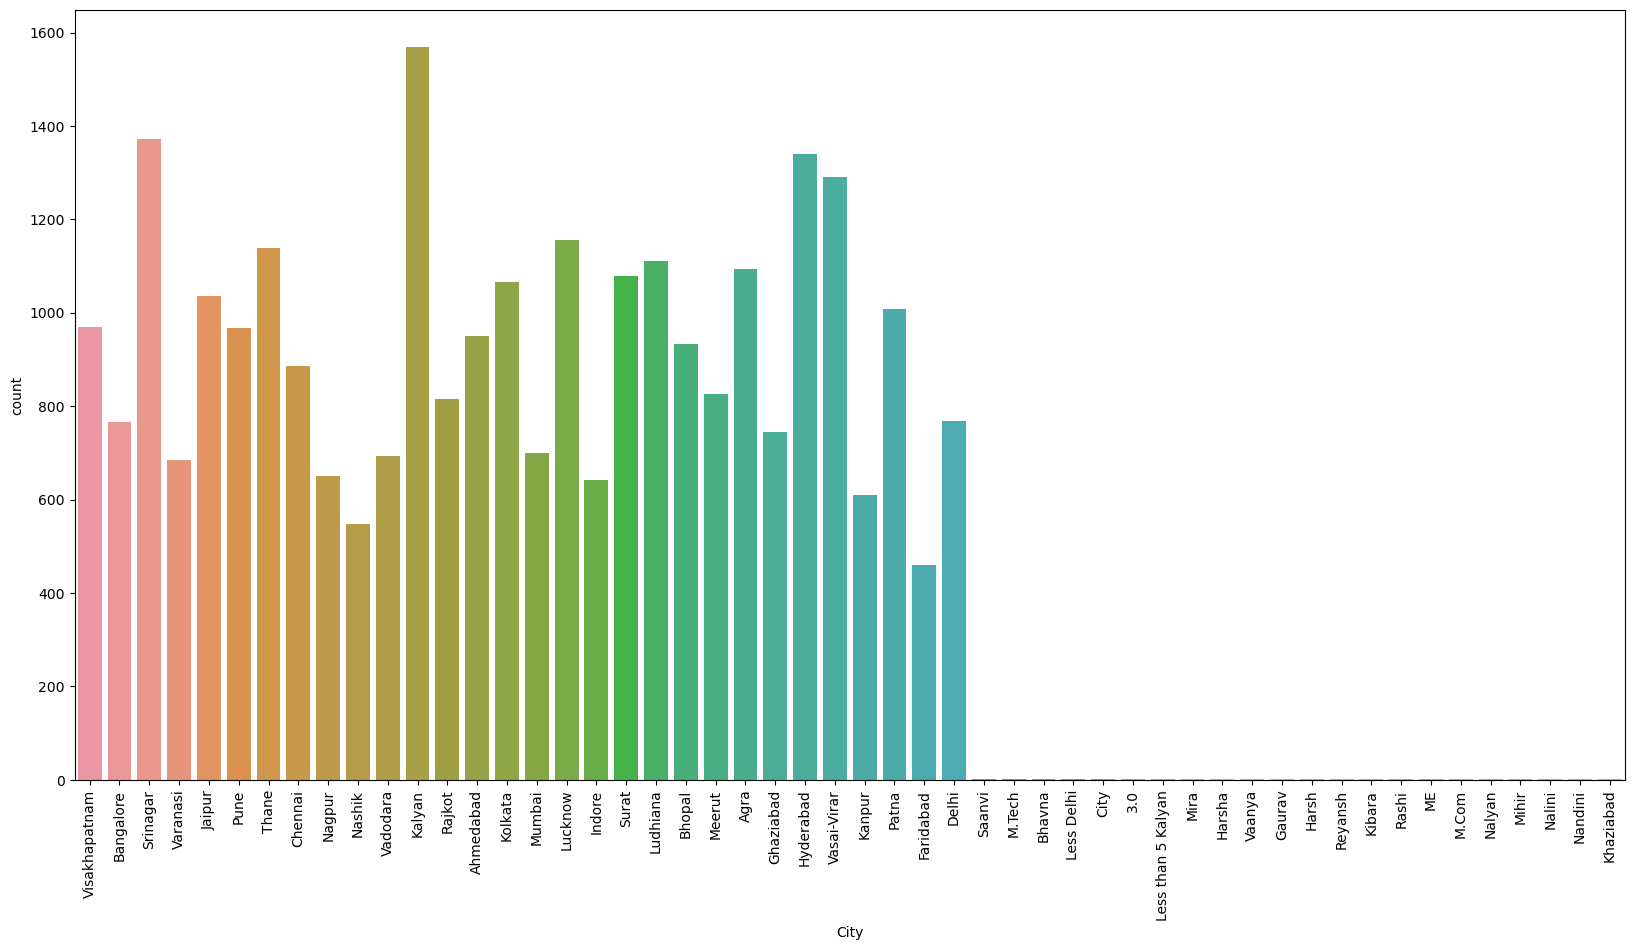

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['City'])
plt.xticks(rotation=90);

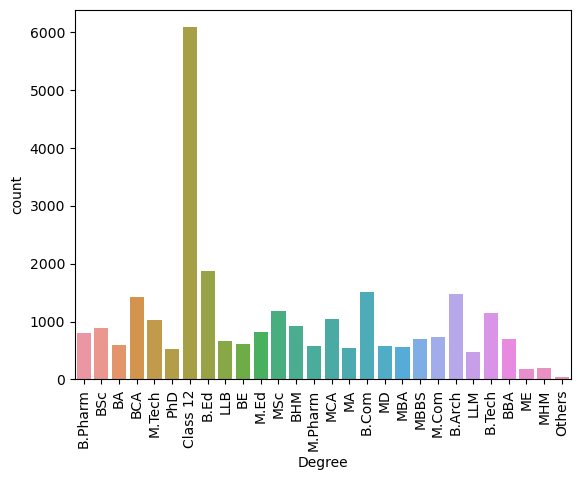

In [13]:
sns.countplot(x=data['Degree'])
plt.xticks(rotation=90)
plt.show()

### Bivariate Analysis:

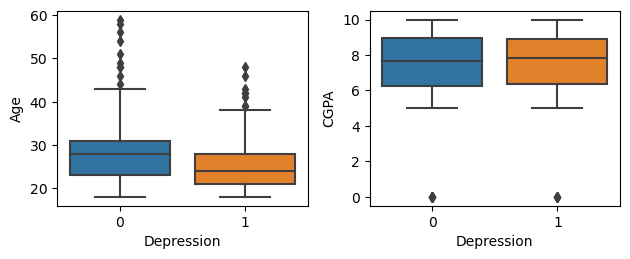

In [14]:
t = 1
for i in nums:
    plt.subplot(2,2,t)
    sns.boxplot(y=data[i],x=data['Depression'])
    t+=1
plt.tight_layout()
plt.show()

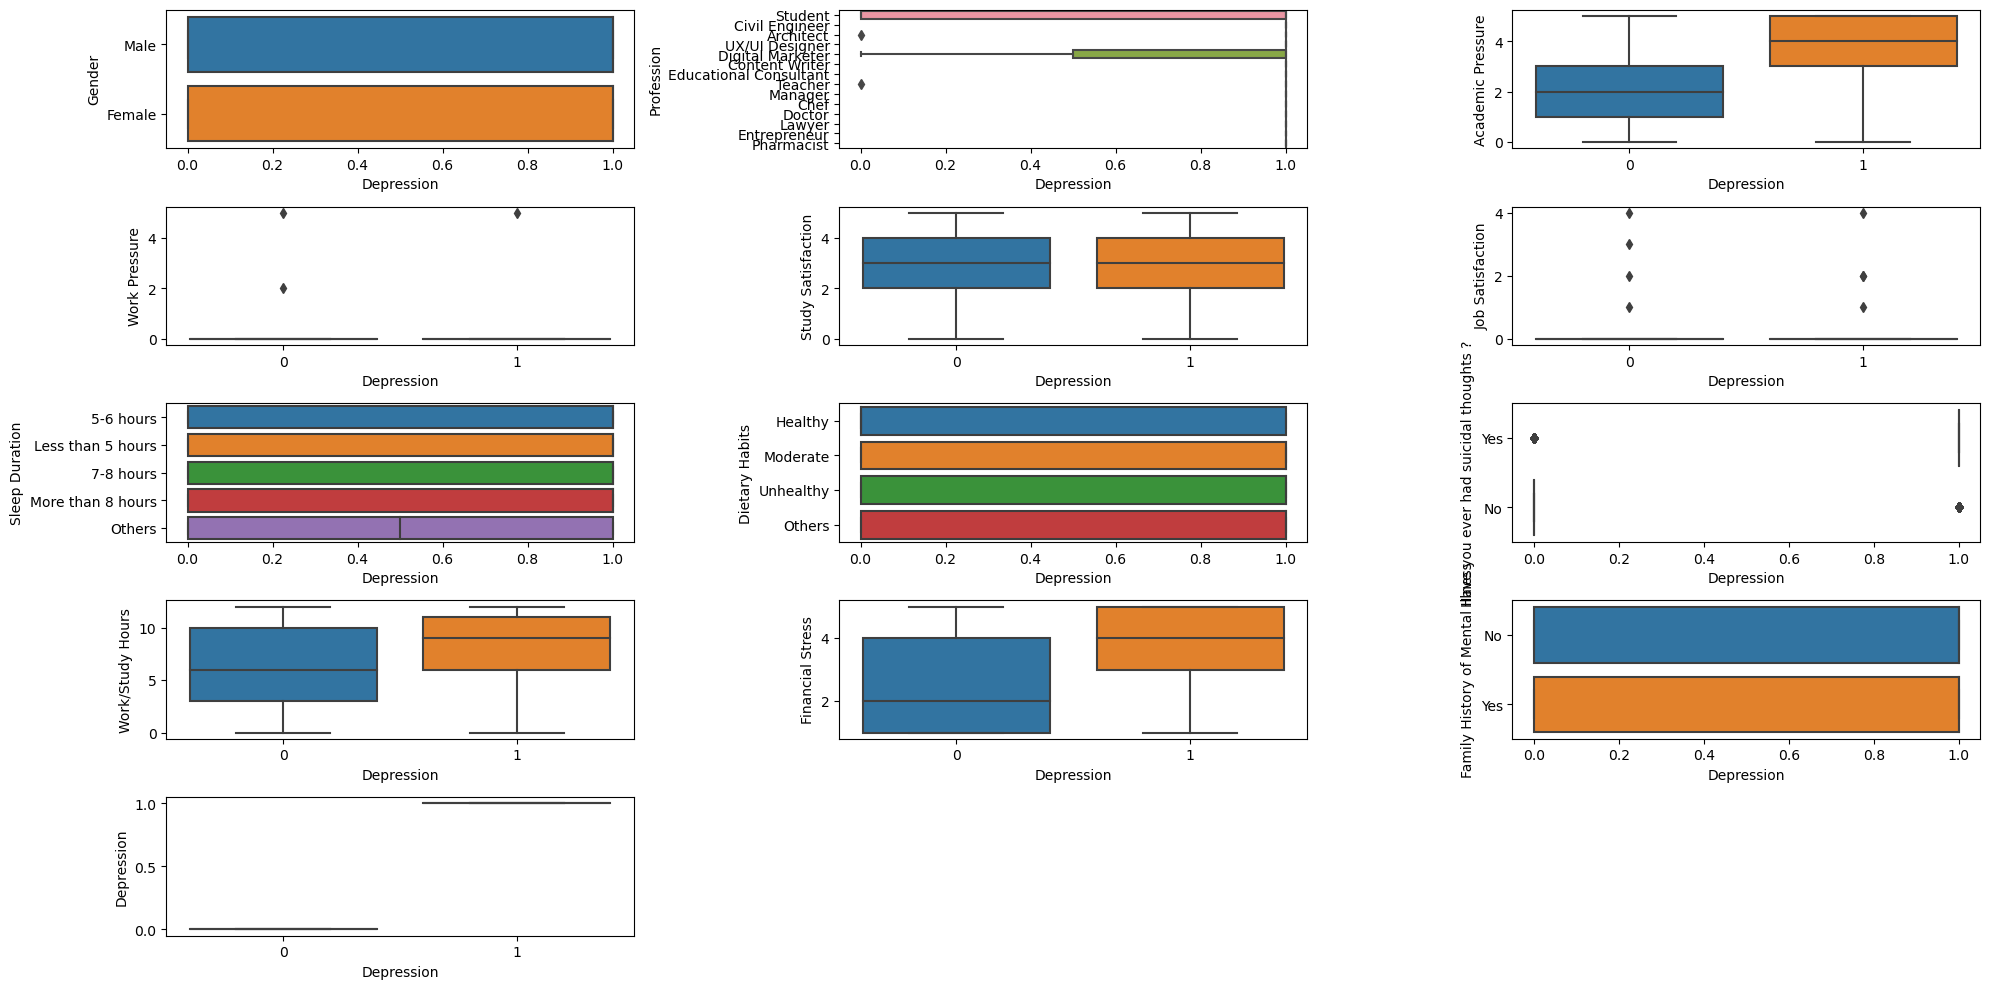

In [15]:
t = 1
plt.figure(figsize=(20,10))
for i in cats:
    plt.subplot(5,3,t)
    sns.boxplot(y=data[i],x=data['Depression'])
    t+=1
plt.tight_layout()
plt.show()

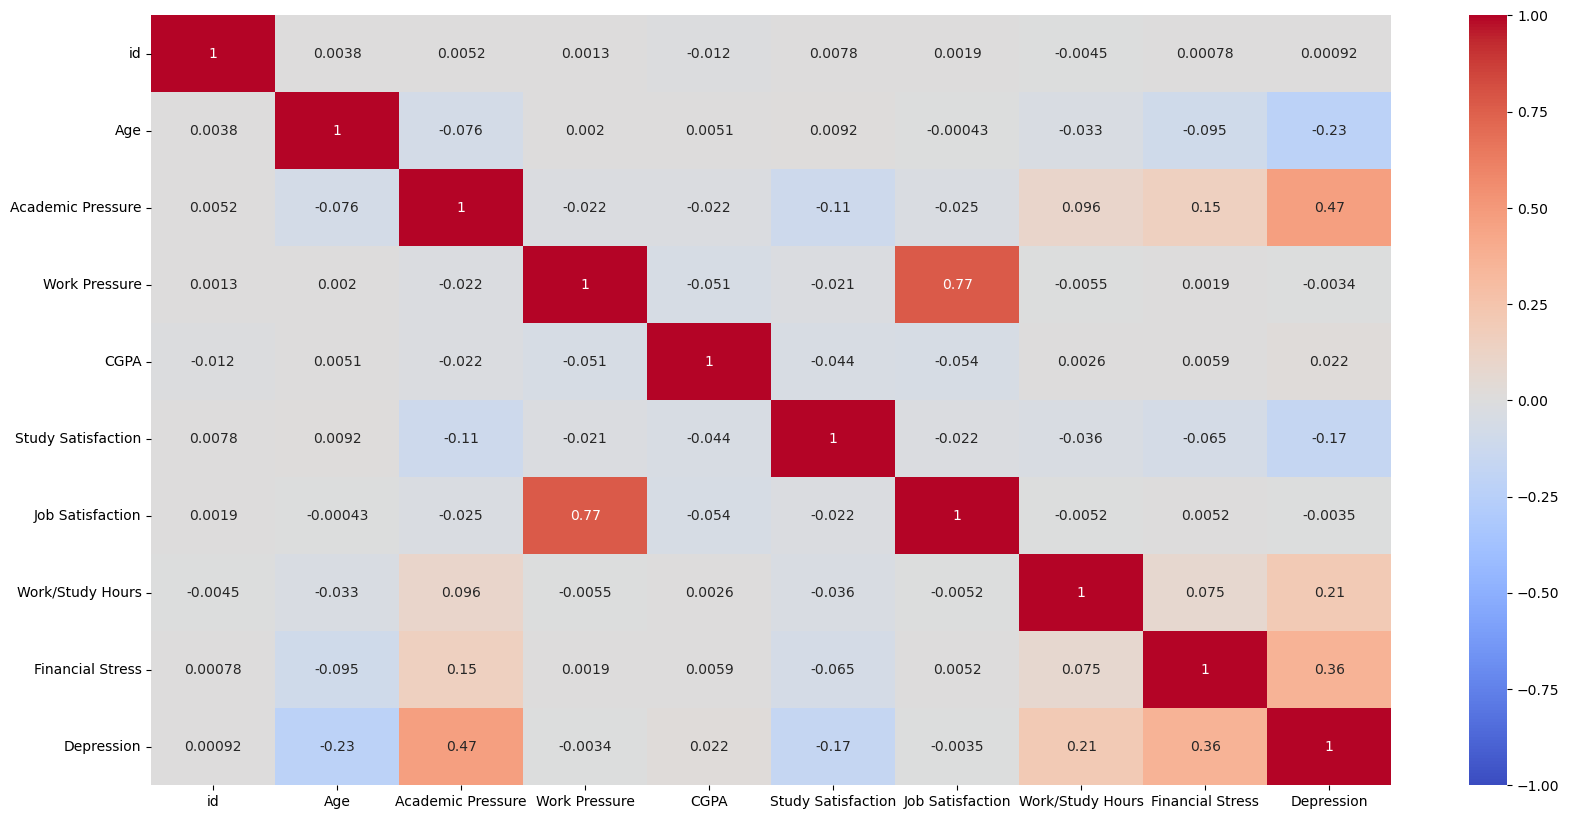

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',vmax=1,vmin=-1);

### Missing Values:

In [17]:
data.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [18]:
data[data['Financial Stress'].isna()]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4458,22377,Female,32.0,Varanasi,Student,3.0,0.0,5.64,1.0,0.0,5-6 hours,Healthy,BCA,No,12.0,NaN,No,1
13596,68910,Male,29.0,Hyderabad,Student,2.0,0.0,8.94,3.0,0.0,Less than 5 hours,Unhealthy,B.Ed,No,12.0,NaN,Yes,0
19266,97610,Female,20.0,Kolkata,Student,1.0,0.0,6.83,1.0,0.0,5-6 hours,Healthy,MBBS,No,9.0,NaN,Yes,0


In [19]:
data_new = data.dropna()

In [20]:
del data_new['id']

In [21]:
data.shape,data_new.shape

((27901, 18), (27898, 17))

### Feature Engineering:

In [22]:
def bins(x):
    if x <= 2:
        return 'low'
    elif 2 < x <= 3:
        return 'Moderate'
    elif 3 < x <= 5: 
        return 'High'


In [23]:
data_new['Academic Pressure_new'] = data_new['Academic Pressure'].apply(bins)

data_new['Study Satisfaction_new'] = data_new['Study Satisfaction'].apply(bins)

data_new['Job Satisfaction_new'] = data_new['Job Satisfaction'].apply(bins)

data_new['Financial Stress_new'] = data_new['Financial Stress'].apply(bins)


In [24]:
def sleep(x):
    if x == 'Less than 5 hours':
        return 'Insufficient'
    elif x == '5-6 hours':
        return 'Sufficient'
    elif x == '7-8 hours':
        return 'Optimal'
    elif x == 'More than 8 hours':
        return 'Excessive'
    elif x == 'Others':  
        return 'Others'


In [25]:
data_new['Sleep category'] = data_new['Sleep Duration'].apply(sleep)

In [26]:
bins = [0, 17, 22, 30, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Mature']
data_new['Age Group'] = pd.cut(data_new['Age'], bins=bins, labels=labels,include_lowest=True)

In [27]:
pd.set_option('display.max_columns',50)

In [28]:
data_new.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic Pressure_new,Study Satisfaction_new,Job Satisfaction_new,Financial Stress_new,Sleep category,Age Group
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,High,low,low,low,Sufficient,Mature
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,low,High,low,low,Sufficient,Adult
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,Moderate,High,low,low,Insufficient,Mature
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,Moderate,low,low,High,Optimal,Adult
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,High,Moderate,low,low,Sufficient,Adult


In [29]:
data_new['Work-Study Balance'] = data_new['Work/Study Hours'] - data_new['Study Satisfaction']

In [30]:
data_new['Overall Satisfaction'] = data_new['Study Satisfaction'] + data_new['Job Satisfaction']

In [31]:
data_new['Overall Satisfaction'] = data_new['Overall Satisfaction'].astype(int)

In [32]:
data_new.head(3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic Pressure_new,Study Satisfaction_new,Job Satisfaction_new,Financial Stress_new,Sleep category,Age Group,Work-Study Balance,Overall Satisfaction
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,High,low,low,low,Sufficient,Mature,1.0,2
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,low,High,low,low,Sufficient,Adult,-2.0,5
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,Moderate,High,low,low,Insufficient,Mature,4.0,5


In [33]:
bins = [0, 5, 7, 10]
labels = ['Low', 'Medium', 'High']
data_new['CGPA Category'] = pd.cut(data_new['CGPA'], bins=bins, labels=labels,include_lowest=True)

In [34]:
data_new['Study Pressure Index'] = data_new['Academic Pressure'] * data_new['Work Pressure']

In [35]:
data_new['Stress Index'] = data_new['Financial Stress'] + (data_new['Family History of Mental Illness'] == 'Yes').astype(int)

In [36]:
data_new['Academic_Work_Pressure'] = data_new['Academic Pressure'] + data_new['Work Pressure']

In [37]:
data_new['Mental_Health_Risk'] = data_new['Family History of Mental Illness'].apply(lambda x: 1 if x == 'Yes' else 0)

In [38]:
data_new.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic Pressure_new,Study Satisfaction_new,Job Satisfaction_new,Financial Stress_new,Sleep category,Age Group,Work-Study Balance,Overall Satisfaction,CGPA Category,Study Pressure Index,Stress Index,Academic_Work_Pressure,Mental_Health_Risk
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,High,low,low,low,Sufficient,Mature,1.0,2,High,0.0,1.0,5.0,0
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,low,High,low,low,Sufficient,Adult,-2.0,5,Medium,0.0,3.0,2.0,1
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,Moderate,High,low,low,Insufficient,Mature,4.0,5,High,0.0,2.0,3.0,1
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,Moderate,low,low,High,Optimal,Adult,2.0,2,Medium,0.0,6.0,3.0,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,High,Moderate,low,low,Sufficient,Adult,-2.0,3,High,0.0,1.0,4.0,0


In [39]:
data_new.shape

(27898, 30)

In [40]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27898 entries, 0 to 27900
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27898 non-null  object  
 1   Age                                    27898 non-null  float64 
 2   City                                   27898 non-null  object  
 3   Profession                             27898 non-null  object  
 4   Academic Pressure                      27898 non-null  float64 
 5   Work Pressure                          27898 non-null  float64 
 6   CGPA                                   27898 non-null  float64 
 7   Study Satisfaction                     27898 non-null  float64 
 8   Job Satisfaction                       27898 non-null  float64 
 9   Sleep Duration                         27898 non-null  object  
 10  Dietary Habits                         27898 non-null  obj

### Statistical Analysis:

In [41]:
for i in data_new.columns:
    tbl = pd.crosstab(data_new[i],data_new['Depression'])
    p_value = stats.chi2_contingency(tbl)[1]
    print(f'P value for {i} is {p_value}')

P value for Gender is 0.7706429931308504
P value for Age is 0.0
P value for City is 1.1124377265309212e-17
P value for Profession is 0.35399089118214033
P value for Academic Pressure is 0.0
P value for Work Pressure is 0.47877205879148477
P value for CGPA is 2.7855510142165158e-11
P value for Study Satisfaction is 2.1456768781560704e-169
P value for Job Satisfaction is 0.8061451100925779
P value for Sleep Duration is 9.240458086403701e-59
P value for Dietary Habits is 1.4332378809995893e-260
P value for Degree is 5.486091936127056e-95
P value for Have you ever had suicidal thoughts ? is 0.0
P value for Work/Study Hours is 1.3366925835170254e-268
P value for Financial Stress is 0.0
P value for Family History of Mental Illness is 4.1555032217252344e-19
P value for Depression is 0.0
P value for Academic Pressure_new is 0.0
P value for Study Satisfaction_new is 2.060007733951425e-159
P value for Job Satisfaction_new is 0.47877205879148477
P value for Financial Stress_new is 0.0
P value for

In [42]:
pval = stats.shapiro(data_new['Age'])[1]
pval

0.0

In [43]:
pval = stats.shapiro(data_new['CGPA'])[1]
pval

0.0

In [44]:
p_value = stats.mannwhitneyu(data_new['Depression'],data_new['Age'])[1]
p_value

0.0

In [45]:
p_value = stats.mannwhitneyu(data_new['Depression'],data_new['CGPA'])[1]
p_value

0.0

In [46]:
data_new1 = data_new.drop(columns=['Gender','Profession','Work Pressure','Job Satisfaction','Job Satisfaction_new','CGPA Category','Study Pressure Index'])

### Feature Encoding:

In [47]:
data_new1.nunique()

Age                                       34
City                                      52
Academic Pressure                          6
CGPA                                     332
Study Satisfaction                         6
Sleep Duration                             5
Dietary Habits                             4
Degree                                    28
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
Academic Pressure_new                      3
Study Satisfaction_new                     3
Financial Stress_new                       3
Sleep category                             5
Age Group                                  3
Work-Study Balance                        18
Overall Satisfaction                       8
Stress Index                               6
Academic_Work_Pressure                     6
Mental_Hea

In [48]:
data_new1.head()

,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic Pressure_new,Study Satisfaction_new,Financial Stress_new,Sleep category,Age Group,Work-Study Balance,Overall Satisfaction,Stress Index,Academic_Work_Pressure,Mental_Health_Risk
0,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,High,low,low,Sufficient,Mature,1.0,2,1.0,5.0,0
1,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,low,High,low,Sufficient,Adult,-2.0,5,3.0,2.0,1
2,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,Moderate,High,low,Insufficient,Mature,4.0,5,2.0,3.0,1
3,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,Moderate,low,High,Optimal,Adult,2.0,2,6.0,3.0,1
4,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,High,Moderate,low,Sufficient,Adult,-2.0,3,1.0,4.0,0


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()
data_new1['City Encode'] = le.fit_transform(data_new1['City'])

In [51]:
data_new1['Degree Encode'] = le.fit_transform(data_new1['Degree'])

In [52]:
data_new1.drop(columns=['City','Degree'],inplace=True)

In [53]:
data_dummy = pd.get_dummies(data_new1,drop_first=True)

In [54]:
data_dummy.shape,data_new1.shape

((27898, 36), (27898, 23))

### Split the data into train and test:

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x = data_dummy.drop(columns='Depression')
y = data_dummy['Depression']

In [57]:
trainx,testx,trainy,testy = train_test_split(x,y,random_state=10,train_size=0.80)

In [58]:
trainx.shape,trainy.shape,testx.shape,testy.shape

((22318, 35), (22318,), (5580, 35), (5580,))

### Modelling:

In [59]:
xgb = XGBClassifier()
xgb.fit(trainx,trainy)
pred_xgb = xgb.predict(testx)
print(classification_report(testy,pred_xgb))
print(roc_auc_score(testy,pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2312
           1       0.85      0.87      0.86      3268

    accuracy                           0.84      5580
   macro avg       0.83      0.83      0.83      5580
weighted avg       0.84      0.84      0.84      5580

0.8299408016500573


In [72]:
gbm = GradientBoostingClassifier()
gbm.fit(trainx,trainy)
pred_gbm = gbm.predict(testx)
print(classification_report(testy,pred_gbm))
print(roc_auc_score(testy,pred_gbm))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2312
           1       0.86      0.89      0.87      3268

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.85      5580
weighted avg       0.85      0.85      0.85      5580

0.8436667506659947


In [73]:
rf = RandomForestClassifier(n_estimators=800,max_depth=5,n_jobs=-1)
rf.fit(trainx,trainy)
pred_rf = rf.predict(testx)
print(classification_report(testy,pred_rf))
print(roc_auc_score(testy,pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      2312
           1       0.83      0.90      0.87      3268

    accuracy                           0.84      5580
   macro avg       0.84      0.82      0.83      5580
weighted avg       0.84      0.84      0.84      5580

0.8240204372482668


In [74]:
ada = AdaBoostClassifier()
ada.fit(trainx,trainy)
pred_ada = ada.predict(testx)
print(classification_report(testy,pred_ada))
print(roc_auc_score(testy,pred_ada))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2312
           1       0.86      0.89      0.88      3268

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.85      5580
weighted avg       0.85      0.85      0.85      5580

0.8446376840749981


In [75]:
lr = LogisticRegression()
lr.fit(trainx,trainy)
pred_lr = lr.predict(testx)
print(classification_report(testy,pred_lr))
print(roc_auc_score(testy,pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2312
           1       0.86      0.88      0.87      3268

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.84      5580
weighted avg       0.85      0.85      0.85      5580

0.8430547555619555


In [76]:
gbm = KNeighborsClassifier()
gbm.fit(trainx,trainy)
pred_gbm = gbm.predict(testx)
print(classification_report(testy,pred_gbm))
print(roc_auc_score(testy,pred_gbm))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68      2312
           1       0.77      0.82      0.79      3268

    accuracy                           0.75      5580
   macro avg       0.74      0.74      0.74      5580
weighted avg       0.75      0.75      0.75      5580

0.7357758784988543


In [77]:
gbm = GaussianNB()
gbm.fit(trainx,trainy)
pred_gbm = gbm.predict(testx)
print(classification_report(testy,pred_gbm))
print(roc_auc_score(testy,pred_gbm))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2312
           1       0.85      0.85      0.85      3268

    accuracy                           0.83      5580
   macro avg       0.82      0.82      0.82      5580
weighted avg       0.83      0.83      0.83      5580

0.8214832516633985


In [66]:
# base model
def base_models():
    models = dict()
    models['LR'] = LogisticRegression()
    models['DTREE'] = DecisionTreeClassifier()
    models['RF'] = RandomForestClassifier()
    models['GBM'] = GradientBoostingClassifier()
    models['XGB'] = XGBClassifier()
    models['ADA'] = AdaBoostClassifier()
    return models

In [82]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import log_loss,make_scorer

def eval_models(model):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1001)
    scores = cross_val_score(estimator=model, X = trainx,y = trainy,cv=cv,scoring='roc_auc',
                            n_jobs=-1)
    return scores

In [81]:
import sklearn

In [86]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [83]:
models = base_models()

result , names = list() , list()

for name , mymodel in models.items():
    finalscore = eval_models(mymodel)
    result.append(finalscore)
    names.append(name)
    print(name,np.mean(result))

LR 0.9204615690205321
DTREE 0.8413534573839225
RF 0.8645823673645358
GBM 0.8784470393514748
XGB 0.8842068896762075
ADA 0.8902381671057368


In [92]:
from sklearn.ensemble import StackingClassifier

GBM = GradientBoostingClassifier()
XGB = XGBClassifier()
ADA = AdaBoostClassifier()
RF = RandomForestClassifier()
lr = LogisticRegression()
base_estimators = [('ADA',ADA),('RF',RF),('GBM',GBM)]
stack = StackingClassifier(estimators = base_estimators,final_estimator=lr,cv=5)

stack.fit(trainx,trainy)
pred = stack.predict(testx)
print(classification_report(testy,pred))
print(roc_auc_score(testy,pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2312
           1       0.86      0.89      0.88      3268

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.85      5580
weighted avg       0.85      0.85      0.85      5580

0.8446848013451186


### Final Model:

In [93]:
ada = AdaBoostClassifier()
ada.fit(trainx,trainy)
pred_ada = ada.predict(testx)
print(classification_report(testy,pred_ada))
print(roc_auc_score(testy,pred_ada))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2312
           1       0.86      0.89      0.88      3268

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.85      5580
weighted avg       0.85      0.85      0.85      5580

0.8446376840749981


### Thank You.....